# [TF]TensorflowのAPIについて

https://qiita.com/supersaiakujin/items/464cc053418e9a37fa7b

# 一定値テンソル

## zeros

numpyのzerosみたい

In [1]:
import tensorflow as tf

x = tf.zeros([1], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[0.]


In [3]:
x = tf.zeros([1, 1], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[[0.]]


In [2]:
x = tf.zeros([1, 2], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[[0. 0.]]


In [4]:
x = tf.zeros([1, 1, 1], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[[[0.]]]


In [5]:
import tensorflow as tf

x = tf.zeros([10], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
import tensorflow as tf

x = tf.zeros([2,10], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## ones

In [7]:
import tensorflow as tf

x = tf.ones([2,10], dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


## fill

定数のTensorを作る。
dtypeが指定できない

In [8]:
import tensorflow as tf

x = tf.fill([2,10], 9.)
with tf.Session() as sess:
    print(x.eval())


[[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


In [9]:
x = tf.fill([1,1], 9.)
with tf.Session() as sess:
    print(x.eval())


[[9.]]


## constant

定数のTensorを作る

In [10]:
import tensorflow as tf

x = tf.constant(9,shape=[2,10],dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())

[[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


In [11]:
import tensorflow as tf
import numpy as np

x = tf.constant(np.arange(20).astype(float),shape=[2,10],dtype=tf.float32)
with tf.Session() as sess:
    print(x.eval())


[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]]


# ランダムテンソル

Tensorをランダムな値で初期化する。
Weightの初期化でよく使われる



## random_normal

Tensorを正規分布なランダム値で初期化する    
mean　平均0    
stddev 標準偏差1

In [48]:
import tensorflow as tf

x = tf.random_normal(shape=[20000],mean=0.0, stddev=1.0,dtype=tf.float32)
with tf.Session() as sess:
    y = x.eval()
print(x.shape)
print(y.shape)

(20000,)
(20000,)


In [49]:
print(x)
print(y[:5])
print(len(y))
x1 = range(len(y))

Tensor("random_normal_5:0", shape=(20000,), dtype=float32)
[-0.11567622 -1.1965735  -0.24979292 -0.85879475  1.5145028 ]
20000


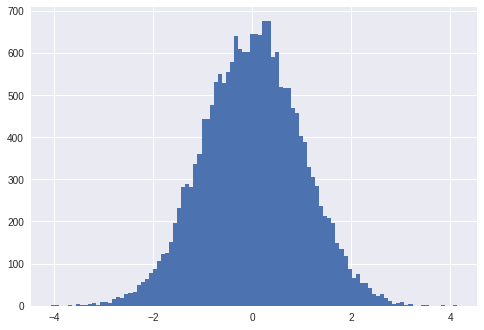

In [50]:
import matplotlib.pyplot as plt
plt.hist(y, bins=100)
plt.show()

In [0]:

x = tf.random_normal(shape=[2000],mean=0.0, stddev=1.0,dtype=tf.float32)
with tf.Session() as sess:
    y = x.eval()

## truncated_normal

Tensorを正規分布かつ標準偏差の２倍までのランダムな値で初期化する



In [0]:
import tensorflow as tf

x = tf.truncated_normal(shape=[20000],mean=0.0, stddev=1.0,dtype=tf.float32)
with tf.Session() as sess:
    y = x.eval()

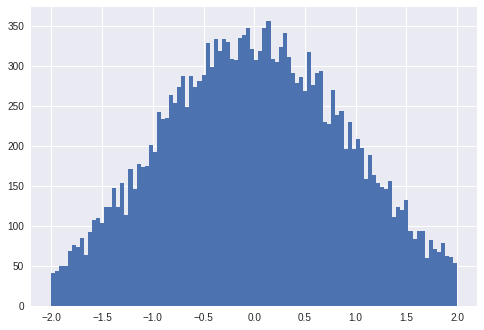

In [47]:
import matplotlib.pyplot as plt
plt.hist(y, bins=100)
plt.show()

## random_uniform

Tensorを一様分布なランダム値で初期化する

In [0]:
import tensorflow as tf

x = tf.random_uniform(shape=[20000], minval=-1.0,maxval=1.0,dtype=tf.float32)
with tf.Session() as sess:
    y = x.eval()

## set_random_seed

randomを使用すると再現性がなくなるが、seedを指定するとこで同じ値を取り出せる。
指定の仕方は、operationに指定するか、set_random_seedでgraph levelで指定する方法がある。

In [57]:
import tensorflow as tf

a = tf.random_uniform([1])
print('session1')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())    


print('session2')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())  

session1
[0.02364397]
[0.2201351]
session2
[0.6502868]
[0.81326354]


In [58]:
import tensorflow as tf
#seedを指定したバージョン
a = tf.random_uniform([1],seed=1234)
print('session1')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())    


print('session2')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())   

session1
[0.848307]
[0.64822805]
session2
[0.848307]
[0.64822805]


In [60]:
import tensorflow as tf
#set_random_seedで指定
tf.set_random_seed(1234)
a = tf.random_uniform([1])
b = tf.random_uniform([1])
print('session1')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())    
    print(b.eval())
    print(b.eval())


print('session2')
with tf.Session() as sess:
    print(a.eval())
    print(a.eval())
    print(b.eval())
    print(b.eval())


session1
[0.9068898]
[0.70314264]
[0.35731006]
[0.65668523]
session2
[0.9068898]
[0.70314264]
[0.35731006]
[0.65668523]


## Shape

Tensorのサイズ（Sharp)を取り出す。



In [61]:
import tensorflow as tf

x = tf.constant(np.arange(60.),shape=[3,4,5],dtype=tf.float32)    
with tf.Session() as sess:
    print(x.eval())

[[[ 0.  1.  2.  3.  4.]
  [ 5.  6.  7.  8.  9.]
  [10. 11. 12. 13. 14.]
  [15. 16. 17. 18. 19.]]

 [[20. 21. 22. 23. 24.]
  [25. 26. 27. 28. 29.]
  [30. 31. 32. 33. 34.]
  [35. 36. 37. 38. 39.]]

 [[40. 41. 42. 43. 44.]
  [45. 46. 47. 48. 49.]
  [50. 51. 52. 53. 54.]
  [55. 56. 57. 58. 59.]]]


In [62]:
import tensorflow as tf

s = x.get_shape()
print(type(s))
print(s)


<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(3, 4, 5)


In [63]:
import tensorflow as tf

s = tf.shape(x)
print(type(s))
print(s)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Shape:0", shape=(3,), dtype=int32)


## get_shape(), tf.shape()

In [0]:
x = tf.placeholder(tf.float32, shape=[None,32])

In [0]:
#例えばplaceholderと同じサイズのTensorを作る場合にget_shapeを使用するとエラーになる
#y = tf.ones(shape=x.get_shape())

In [0]:
y = tf.ones(shape=tf.shape(x))

In [69]:
import tensorflow as tf

x = tf.placeholder(tf.float32, shape=[None,32])
y = tf.ones(shape=tf.shape(x))

z = y + x
with tf.Session() as sess:    
    # sess.run(y)  
    b = np.arange(3*32).reshape((3,32))
    print(sess.run(z, feed_dict={x:b}))

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
  19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
 [33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.
  51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
 [65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
  83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96.]]


このようにtf.shapeの一部分を使用して[]でくくるとListになってしまう。

In [72]:
print(tf.shape(x))
print(tf.shape(x)[0])
print(type([tf.shape(x)[0],1]))

Tensor("Shape_6:0", shape=(2,), dtype=int32)
Tensor("strided_slice_9:0", shape=(), dtype=int32)
<type 'list'>


この場合はtf.stackを使用してoperationにする。(packはstackになったようです)

In [73]:
print(type(tf.stack([tf.shape(x)[0],1])))

<class 'tensorflow.python.framework.ops.Tensor'>


## スライシングと結合

## slice

Tensorの一部分を取り出す。
beginで開始場所、sizeで切り出す大きさを指定する。

In [78]:
import tensorflow as tf

n = np.arange(25).reshape((1,5,5))
x = tf.concat([n, n*10, n*100],0)
with tf.Session() as sess:   
    print(x.eval())


[[[   0    1    2    3    4]
  [   5    6    7    8    9]
  [  10   11   12   13   14]
  [  15   16   17   18   19]
  [  20   21   22   23   24]]

 [[   0   10   20   30   40]
  [  50   60   70   80   90]
  [ 100  110  120  130  140]
  [ 150  160  170  180  190]
  [ 200  210  220  230  240]]

 [[   0  100  200  300  400]
  [ 500  600  700  800  900]
  [1000 1100 1200 1300 1400]
  [1500 1600 1700 1800 1900]
  [2000 2100 2200 2300 2400]]]


In [0]:
#下記の例では、６の位置から、０次元方向に３，１次元方向に２、３次元方向に４つ分取り出す。


In [75]:
import tensorflow as tf

y = tf.slice(x, [0,1,1], [3,2,4])    
with tf.Session() as sess:   
    print(y.eval())


[[[   6    7    8    9]
  [  11   12   13   14]]

 [[  60   70   80   90]
  [ 110  120  130  140]]

 [[ 600  700  800  900]
  [1100 1200 1300 1400]]]


## concat

Tensorを結合する。

In [83]:
import tensorflow as tf

x = tf.ones([3,4], dtype=tf.float32)
y = tf.constant(2,shape=[3,4], dtype=tf.float32)
y3 = tf.constant(3,shape=[3,4], dtype=tf.float32)

with tf.Session() as sess:   
    print("x")
    print(x.eval())
    print("y")
    print(y.eval())
    print("y3")
    print(y3.eval())

x
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
y
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y3
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


２番目の引数で結合するDimensionを決定する。    
2次元のTensorで、Dimensionが0の場合は、結果はｚ１のように[[xxxx],[xxxx],[yyyy],[yyyy]...]という並びのTensorになる。    
Dimensionが１の場合は、結果はｚ２のように[[xxxxyyyy],[xxxxyyyy],...]という並びのTensorになる。    



In [84]:
import tensorflow as tf

z1 = tf.concat([x, y],0)
z2 = tf.concat([x, y],1)
with tf.Session() as sess:   
    print('z1')
    print(z1.eval())
    print('z2')
    print(z2.eval())

z1
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
z2
[[1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2.]]


In [85]:
import tensorflow as tf

x = tf.ones([3,4,5], dtype=tf.float32)
y = tf.constant(2,shape=[3,4,5], dtype=tf.float32)
with tf.Session() as sess:   
    print(x.eval())
    print(y.eval())

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
[[[2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]]

 [[2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]]

 [[2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]]]


## split

Tensorを指定した次元方向に分割する

In [86]:
import tensorflow as tf

n = np.arange(25).reshape((1,5,5))
x = tf.concat([n, n*10, n*100],0)
with tf.Session() as sess:   
    print(x.eval())

[[[   0    1    2    3    4]
  [   5    6    7    8    9]
  [  10   11   12   13   14]
  [  15   16   17   18   19]
  [  20   21   22   23   24]]

 [[   0   10   20   30   40]
  [  50   60   70   80   90]
  [ 100  110  120  130  140]
  [ 150  160  170  180  190]
  [ 200  210  220  230  240]]

 [[   0  100  200  300  400]
  [ 500  600  700  800  900]
  [1000 1100 1200 1300 1400]
  [1500 1600 1700 1800 1900]
  [2000 2100 2200 2300 2400]]]


0次元方向に３つに分割した例



In [87]:
import tensorflow as tf

y1, y2, y3 = tf.split(x, 3, 0)
with tf.Session() as sess:
    print('y1')
    print(y1.eval())
    print('y2')
    print(y2.eval())
    print('y3')
    print(y3.eval())

y1
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]]
y2
[[[  0  10  20  30  40]
  [ 50  60  70  80  90]
  [100 110 120 130 140]
  [150 160 170 180 190]
  [200 210 220 230 240]]]
y3
[[[   0  100  200  300  400]
  [ 500  600  700  800  900]
  [1000 1100 1200 1300 1400]
  [1500 1600 1700 1800 1900]
  [2000 2100 2200 2300 2400]]]


## tile

In [88]:
import tensorflow as tf

x = tf.constant([[1,0],[0,1]])
with tf.Session() as sess:   
    print(x.eval())


[[1 0]
 [0 1]]


繰り返したい次元方向を指定する。下記は０次元方向に２回繰り返した例。

In [89]:
import tensorflow as tf

y = tf.tile(x, [2,1])
with tf.Session() as sess:   
    print(y.eval())

[[1 0]
 [0 1]
 [1 0]
 [0 1]]


In [90]:
import tensorflow as tf

y = tf.tile(x, [3,1])
with tf.Session() as sess:   
    print(y.eval())

[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]


１次元方向に２回繰り返した例

In [91]:
import tensorflow as tf

y = tf.tile(x, [1,2])
with tf.Session() as sess:   
    print(y.eval())

[[1 0 1 0]
 [0 1 0 1]]


In [92]:
import tensorflow as tf

y = tf.tile(x, [1,3])
with tf.Session() as sess:   
    print(y.eval())

[[1 0 1 0 1 0]
 [0 1 0 1 0 1]]


０次元方向と１次元方向に２回繰り返した例

In [93]:
import tensorflow as tf

y = tf.tile(x, [2,2])
with tf.Session() as sess:   
    print(y.eval())

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]


## pad

0 paddingする

In [94]:
import tensorflow as tf

n = np.arange(25).reshape((5,5))
x = tf.constant(n)
with tf.Session() as sess:   
    print(x.eval())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


topに１、bottomに２、leftに３、rightに４つ分０ paddingした例

In [95]:
import tensorflow as tf

y = tf.pad(x,[[1,2],[3,4]])
with tf.Session() as sess:   
    print(y.eval())

[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  3  4  0  0  0  0]
 [ 0  0  0  5  6  7  8  9  0  0  0  0]
 [ 0  0  0 10 11 12 13 14  0  0  0  0]
 [ 0  0  0 15 16 17 18 19  0  0  0  0]
 [ 0  0  0 20 21 22 23 24  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
